# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco to allow potential real estate investors to choose rental investment properties. 

In [69]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from panel.interact import interact
import panel as pn

%matplotlib inline
pn.extension('plotly')
pn.extension()

In [70]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_API_KEY")


## Load Data

In [71]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [72]:
# Calculate the mean number of housing units per year (hint: use groupby) 

housing_units_per_year= sfo_data.groupby('year').mean()['housing_units']
housing_units_per_year

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

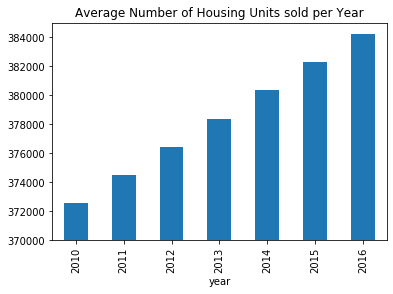

In [73]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
fig_housing_units = housing_units_per_year.plot.bar(x='year', ylim=[370000,385000], title='Average Number of Housing Units sold per Year')

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!


# plt.show()
# plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [74]:
# Calculate the average gross rent and average sale price per square foot
average_gross_rent = sfo_data.groupby('year').mean()['gross_rent']
average_gross_rent


year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
2015    3739
2016    4390
Name: gross_rent, dtype: int64

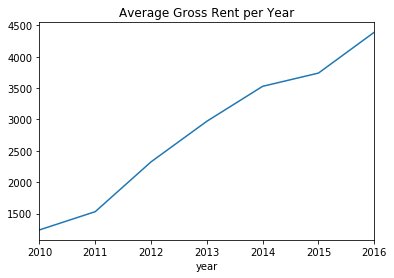

In [75]:
# Plot the Average Gross Rent per Year as a Line Chart 
average_gross_rent.plot.line(title='Average Gross Rent per Year')

### Average Sales Price per Year

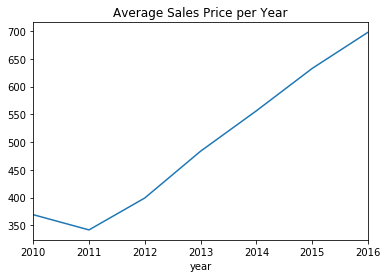

In [76]:
# Plot the Average Sales Price per Year as a line chart
average_saleprice = sfo_data.groupby('year').mean()['sale_price_sqr_foot']
average_saleprice.plot.line(title = 'Average Sales Price per Year')


- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [77]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo_data_grp = sfo_data.groupby(['year','neighborhood']).mean()
sfo_data_grp.head()

sale_price_sqr_foot  housing_units  gross_rent
year neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [78]:
sfo_sales = sfo_data_grp['sale_price_sqr_foot']
sfo_sales_df = pd.DataFrame(sfo_sales).reset_index()
sfo_sales_df.head(10)

year      neighborhood  sale_price_sqr_foot
0  2010      Alamo Square           291.182945
1  2010        Anza Vista           267.932583
2  2010           Bayview           170.098665
3  2010  Buena Vista Park           347.394919
4  2010  Central Richmond           319.027623
5  2010    Central Sunset           418.172493
6  2010    Corona Heights           369.359338
7  2010        Cow Hollow           569.379968
8  2010     Croker Amazon           165.645730
9  2010   Diamond Heights           456.930822

In [79]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

def choose_neighborhodd(neighborhood): 
    
    return sfo_sales_df.loc[sfo_data_grp['neighborhood']==neighborhood,:].hvplot.line(
        x='year',
        y='sale_price_sqr_foot',
        colormap='viridis',
        title='SF Sale per Square Foot per Year'
    )
neighborhood_choice = sfo_sales_df['neighborhood'].unique()

interact(choose_neighborhodd, neighborhood=neighborhood_choice)


KeyError: 'neighborhood'

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [80]:
# Getting the data from the top 10 expensive neighborhoods
top_10 = sfo_data.groupby('neighborhood').mean()['sale_price_sqr_foot']
top_10 = top_10.sort_values(ascending = False)
top_10 = top_10.iloc[0:10]
top_10

neighborhood
Union Square District    903.993258
Merced Heights           788.844818
Miraloma Park            779.810842
Pacific Heights          689.555817
Westwood Park            687.087575
Telegraph Hill           676.506578
Presidio Heights         675.350212
Cow Hollow               665.964042
Potrero Hill             662.013613
South Beach              650.124479
Name: sale_price_sqr_foot, dtype: float64

In [81]:
# Plotting the data from the top 10 expensive neighborhoods
top_10.hvplot.bar(
    x='neighborhood',
    y='',
    title = 'Top 10 Most Expensive Neighborhoods',
    height=500,
    rot = 90
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

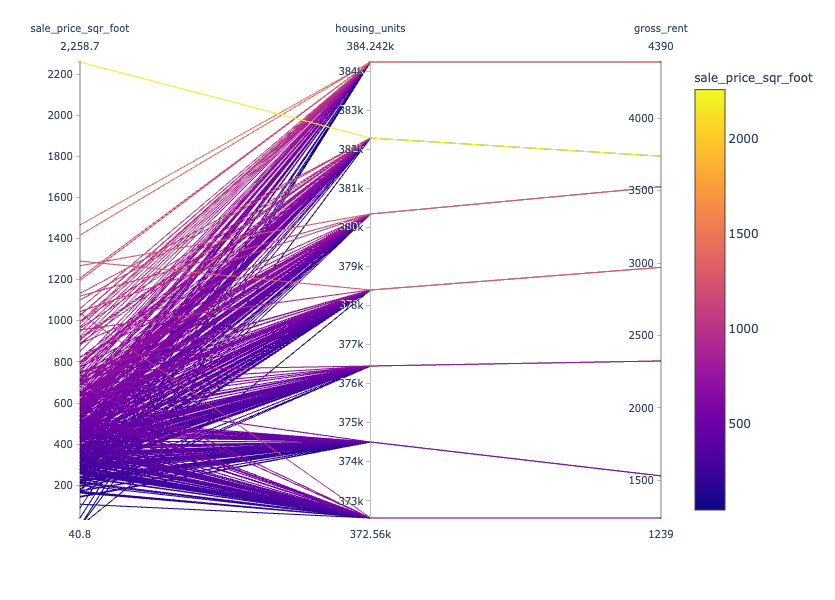

In [82]:
# Parallel Coordinates Plot
px.parallel_coordinates(sfo_data, color='sale_price_sqr_foot')

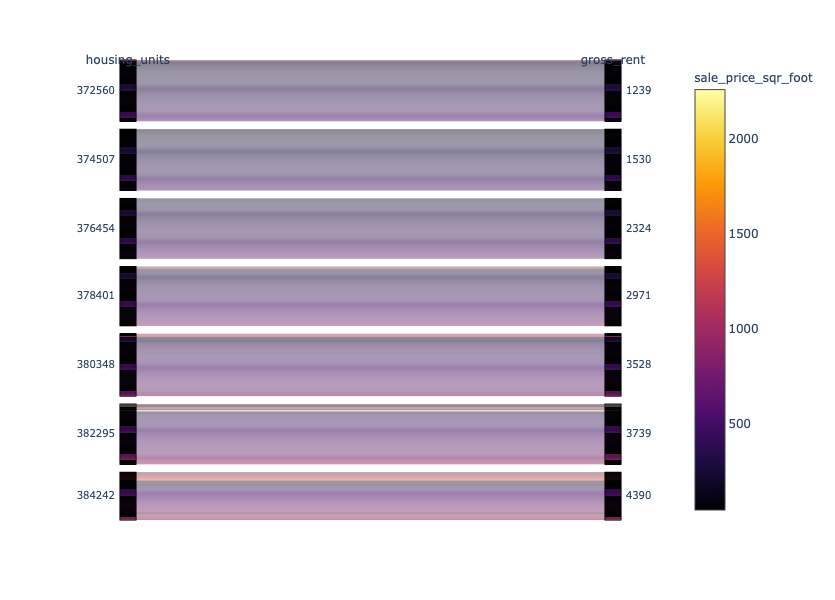

In [83]:
# Parallel Categories Plot
px. parallel_categories(
    sfo_data,
    dimensions = ['neighborhood','sale_price_sqr_foot','housing_units','gross_rent'],
    color = 'sale_price_sqr_foot',
    color_continuous_scale = px.colors.sequential.Inferno
)

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [84]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path, index_col='Neighborhood')
df_neighborhood_locations.head()

Lat         Lon
Neighborhood                          
Alamo Square     37.791012 -122.402100
Anza Vista       37.779598 -122.443451
Bayview          37.734670 -122.401060
Bayview Heights  37.728740 -122.410980
Bernal Heights   37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [85]:
# Calculate the mean values for each neighborhood
avg_value_neighborhood = sfo_data.groupby('neighborhood').mean()
avg_value_neighborhood.head()

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

In [86]:
# Join the average values with the neighborhood locations
all_data = pd.concat([avg_value_neighborhood,df_neighborhood_locations], join='inner', axis='columns')
all_data.head()

sale_price_sqr_foot  housing_units   gross_rent        Lat  \
Alamo Square               366.020712       378401.0  2817.285714  37.791012   
Anza Vista                 373.382198       379050.0  3031.833333  37.779598   
Bayview                    204.588623       376454.0  2318.400000  37.734670   
Bayview Heights            590.792839       382295.0  3739.000000  37.728740   
Buena Vista Park           452.680591       378076.5  2698.833333  37.768160   

                         Lon  
Alamo Square     -122.402100  
Anza Vista       -122.443451  
Bayview          -122.401060  
Bayview Heights  -122.410980  
Buena Vista Park -122.439330

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [87]:
# Create a scatter mapbox to analyze neighborhood info
 
px.scatter_mapbox(
    all_data,
    lat='Lat',
    lon='Lon',
    size= 'sale_price_sqr_foot',
    color='gross_rent',
    title='Average Sale Price per Sqaure Foot and Gross Rent in San Francisco'
)